# Bases de datos
Las bases de datos (dataframes) nos permiten tener información organizada, mediante columnas, de distintos tipos de datos.

Para hacer uso de ellos necesitaremos tener el módulo *pandas*
## Crear bases de datos
Podemos crear dataframes de dos maneras: por medio de un diccionario o por medio de una matriz.
### Crear bases de datos con un diccionario
Para convertir a dataframe instanciamos un objeto de tipo DataFrame. La clave será el nombre de la columna y el valor será los elementos que habrá.

In [1]:
import pandas as pd
diccionario={
    'Alumno':['Edgar','Kathy','Juan','Salvador'],
    'Tareas':[8,9.2,7,10],
    'Expediente':['1245','7889','3215','4567'],
    'Parciales':[10,10,8,9]
}
df=pd.DataFrame(diccionario)
print(df)

     Alumno  Tareas Expediente  Parciales
0     Edgar     8.0       1245         10
1     Kathy     9.2       7889         10
2      Juan     7.0       3215          8
3  Salvador    10.0       4567          9


## Acceder a columnas
Para acceder a las columnas del dataframe podemos hacerlo por: clave o atributo.
### Acceder a columnas por clave
Usamos igual que un diccionario donde la clave es la columna a la que nosotros queremos acceder.

In [2]:
print(df['Expediente'])

0    1245
1    7889
2    3215
3    4567
Name: Expediente, dtype: object


### Accerder a columnas por atributo
Los atributos de los dataframes son sus columnas por lo que para acceder a ellas sólo necesitamos usar la notación punto.

In [3]:
print(df.Expediente)

0    1245
1    7889
2    3215
3    4567
Name: Expediente, dtype: object


### Acceder a un elemento de una columna
Una columna es una Serie por lo que para acceder a un valor en específico sólo necesitamos poner su índice 

In [4]:
print(df.Expediente[1]) # accede al expediente del 2do alumno

7889


### Acceder a elementos que cumplan un criterio
Muchas veces necesitaremos acceder a elementos que cumplan cierta característica y la manera de proceder es exactamente igual que en el lenguaje R.

Por ejemplo, con la siguiente línea de código nosotros vamos a imprimir el nombre de todos los alumnos que tengan una calificación en sus tareas mayor a 8.

In [6]:
print(df.Alumno[df.Tareas>8])
print(df.Expediente[df.Parciales>8])

1       Kathy
3    Salvador
Name: Alumno, dtype: object
0    1245
1    7889
3    4567
Name: Expediente, dtype: object


## Cambiar nombre de columnas
Usamos el método rename() y modificamos el parámetro columns con un diccionario.

In [7]:
print(df.rename(columns={'Parciales':'Examen'}))

     Alumno  Tareas Expediente  Examen
0     Edgar     8.0       1245      10
1     Kathy     9.2       7889      10
2      Juan     7.0       3215       8
3  Salvador    10.0       4567       9


In [8]:
print(df)

     Alumno  Tareas Expediente  Parciales
0     Edgar     8.0       1245         10
1     Kathy     9.2       7889         10
2      Juan     7.0       3215          8
3  Salvador    10.0       4567          9


**Nota**: el cambio se hace por valor, no por referencia. Es decir, me crea un nuevo dataframe; no me modifica el que ya tengo.

## Aplicar funciones
Imagina que quisiéramos darles un punto extra en tareas a todos los alumnos solamente porque somos bien buena onda, entonces si te fijas tendríamos que sumarle 1 a toda la columna de *Tareas*. Y aquí es cuando entra en juego la función **apply**
### Función apply()
*Sintaxis*: apply(func, convert_dtype=True, args=())

In [11]:
# creamos nuestra función
def sumar_1(calificacion):
    return calificacion+1
# la aplicamos a la columna de Tareas
df.Tareas=df.Tareas.apply(sumar_1) # porque es por valor
print(df)

     Alumno  Tareas Expediente  Parciales
0     Edgar     9.0       1245         10
1     Kathy    10.2       7889         10
2      Juan     8.0       3215          8
3  Salvador    11.0       4567          9


### apply(lambda)
Utilizamos *lambda* cuando queramos definir una función temporal.

En nuestro caso quedaría del siguiente modo.

In [12]:
print(df.apply( lambda calificacion: calificacion['Tareas']+1 ,axis=1 ))

0    10.0
1    11.2
2     9.0
3    12.0
dtype: float64


**Nota**: usamos *axis=1* porque nos queremos mover respecto a las filas. Si quisiéramos respecto a las columnas sería con *axis=0*.

## Atributo loc[]
El atributo loc nos permite accesar a la fila del índice que nosotros indiquemos.

In [13]:
# accesamos a la columna 0 que es la correspondiente a la información de Edgar
print(df.loc[0])

Alumno        Edgar
Tareas            9
Expediente     1245
Parciales        10
Name: 0, dtype: object


### Acceder a un rango de índices
Procedemos con el *slicing*

In [14]:
# nos imprime los la información de los 3 primeros alumnos
print(df.loc[0:2])

  Alumno  Tareas Expediente  Parciales
0  Edgar     9.0       1245         10
1  Kathy    10.2       7889         10
2   Juan     8.0       3215          8


### Acceder a una columna en específico
Ponemos de segundo argumento la columna que queramos

In [15]:
# nos imprime el nombre de los 3 primeros alumnos
print(df.loc[0:2,'Alumno'])

0    Edgar
1    Kathy
2     Juan
Name: Alumno, dtype: object


### Acceder a varias columnas
En el segundo argumento ponemos todas las columnas a las cuales queramos acceder.

In [16]:
# nos imprime el nombre y la calificación de los parciales de los primeros 2 alumnos.
print(df.loc[0:1,['Alumno','Parciales']])

  Alumno  Parciales
0  Edgar         10
1  Kathy         10


Por último hagamos una gráfica de barras de las calificaciones parciales de los alumnos, haciendo uso del módulo *matplotlib*

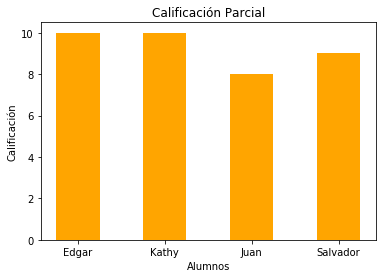

In [18]:
import matplotlib.pyplot as plt

plt.bar(df.Alumno,df.Parciales,width=0.5,color='orange')
plt.title('Calificación Parcial')
plt.xlabel('Alumnos')
plt.ylabel('Calificación')
plt.show()